**Table of contents**<a id='toc0_'></a>    
- [Introduction](#toc1_)    
- [Dataset](#toc2_)    
  - [Source](#toc2_1_)    
  - [Description](#toc2_2_)    
  - [Data Dictionary](#toc2_3_)    
  - [Variable notes](#toc2_4_)    
- [Import libs](#toc3_)    
- [Read data](#toc4_)    
- [EDA (Exploratory Data Analysis)](#toc5_)    
  - [Base feature statistics](#toc5_1_)    
    - [Numerical features](#toc5_1_1_)    
    - [Object features](#toc5_1_2_)    
  - [Classify features](#toc5_2_)    
    - [Categorical types](#toc5_2_1_)    
      - [Nominal Features](#toc5_2_1_1_)    
      - [Ordinal Feature](#toc5_2_1_2_)    
    - [Numerical Features](#toc5_2_2_)    
      - [Continuous Features](#toc5_2_2_1_)    
      - [Discrete Features](#toc5_2_2_2_)    
  - [Features data type](#toc5_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Introduction](#toc0_)

This notebook is an introduction to the topic of machine learning issue. It present a classification approach using data from the **Titanic** dataset.

The goal in this task will be classify people into the correct group (Survive/Not Survive) based on the features.

**Steps:**

1. At the beginning of this file the data (features) will be described to understand what each fearture means.
2. The next step will be perform **EDA** (**E**xploratory **D**ata **A**nalysis), where it will try to understand data through visualizations. Check the null values, outlier, correlations
3. Third step will prepare data to create a model. It include Imputate empty data, transform categorical data, featre scaling and split data into train set and test set.
4. Next step will be  to build a simple model to obrain  a starting value (for comparsion purposes)
5. Create new features and comparing the quality of models
6. Optimalize model using diferent hyperparameters (using GridSearchCv or RandomizedSearchCV)
7. Conlusions - Summary results and discussing about the most important features
8. Suggestion - How to develop this model in next steps ?
9. Save model to the file (.pkl)
  


# <a id='toc2_'></a>[Dataset](#toc0_)

## <a id='toc2_1_'></a>[Source](#toc0_)

The data comes from [**Kaggle - titanic dataset**]([www.kaggle.com](https://www.kaggle.com/competitions/titanic/)) 

## <a id='toc2_2_'></a>[Description](#toc0_)

The dataset is split to 2 files:
- training set (titanic_train.csv)
- test test (titanic_test.csv)

**The training set** - should be used to build machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

**The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

## <a id='toc2_3_'></a>[Data Dictionary](#toc0_)

| Variable | Definition | Key |
| :---: | :---: | :---: |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | |
| Age | Age in years | |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / childrean aboard The Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| name | Person names | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

## <a id='toc2_4_'></a>[Variable notes](#toc0_)

**pclass** - A proxy for socio-economic status (SES)

1st = UPPER

2nd = MIDDLE

3rd = LOWER

**age** - Age is fractional if less than 1 . If the age is estimated, is it in the form of xx.**5**



**sibsp** - family relations define as:

Siblings = brother, sisters, stepbrother, stepsister <br/>
Spouse = husband, wife (mistresses and fiances were ignored)



**parch** - family relations define as:

Parent = monther, father <br/>
Child = daughter, son, stepdaughter, stepson

# <a id='toc3_'></a>[Import libs](#toc0_)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# <a id='toc4_'></a>[Read data](#toc0_)

In [2]:
df = pd.read_csv('datasets/tytanic_train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# <a id='toc5_'></a>[EDA (Exploratory Data Analysis)](#toc0_)

- Base statistic of each feature
- Classify feature to group
- Check null values
- Visualize features
- Distribution analysis
- Correlation analysis
 

## <a id='toc5_1_'></a>[Base feature statistics](#toc0_)

We can check basic stats by using df.describe, but we should divide it on numerical feature and object features

### <a id='toc5_1_1_'></a>[Numerical features](#toc0_)

In [3]:
print('Basic statistics for the numerical features:')
df.describe(include='number')

Basic statistics for the numerical features:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Description of above statistics**:

**PassengerId** - Count 891 - not null values in range 1-891

**Survived** <span style="color:red;">Target feature!</span>- 891, so not null values, it's binary values 0/1. <br/>
&emsp; mean is ~0.38, so 38% people alive

**Pclass** - no null values, 75% or more were in second class

**Age** - Null values exists, mean age is 29-30 yo with quite a large deviation (~14.5). Range is from 0.42 to 80. <br/>
&emsp; .75 percentile is 38, so we can assume that outlier exist in this feature

**Sibsp** - No null values, on avg, the person travel with  1 Sib/Spouse. .75 percentile is 1, so outlier can exists.
The range is 0 to 8

**Parch** - No null values, on avg, the person do not travel with Parent or Child. .75 percentile is 0, so outlier can exists.
The range is 0-6

**Fare** - No Null values, on avg person fare 32, with huge deviation. There is a huge probablity on outlier because averege value deviate from median (avg 32 to 14 median). We can see 75% data of fare is to 31 value. The range is 0 to 512, so exists person that do not fare for ticket.






### <a id='toc5_1_2_'></a>[Object features](#toc0_)

In [4]:
print("Basic statistics for object type features:")
df.describe(exclude='number')

Basic statistics for object type features:


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


**Description of above statistics:**

**Name** - No null value, we have all unique names (count == unique number)

**Sex** - No null values, we have two diffrent values. The values is Male - 577, Famale - 314

**Ticket** - No null values, ticket are not unique? why? group tickets? - The most freq of duplicate ticket is 7

**Cabin** - Huge amount of null values - propably not usefull feature (to drop?), sometimes cabin are duplicate (shared cabin?)

**Embarked** - two cases of null values. 3 different values, where S is the top (644 times)

## <a id='toc5_2_'></a>[Classify features](#toc0_)

To check types of each featue we will use `df.info()` - this function print information about feature type and number of non-null values and dataset like number entries (range)
  

In [5]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### <a id='toc5_2_1_'></a>[Categorical types](#toc0_)

This type we can divide to:

- Nominal Feature - Categories without any specific order (ex. colors)
- Ordinal Feature - Categories with a logical ordel (ex. education level)



#### <a id='toc5_2_1_1_'></a>[Nominal Features](#toc0_)

- Name
- Sex
- Ticket
- Cabin
- Embarked

#### <a id='toc5_2_1_2_'></a>[Ordinal Feature](#toc0_)

- Pclass
  


### <a id='toc5_2_2_'></a>[Numerical Features](#toc0_)

Numerical feature could be divide into group:

- Continuous Features - Can take any value with a range
- Discrete Features - Take specific integer values


#### <a id='toc5_2_2_1_'></a>[Continuous Features](#toc0_)

- Fare
- Age

#### <a id='toc5_2_2_2_'></a>[Discrete Features](#toc0_)

- SibSp
- Parch


### <a id='toc5_3_'></a>[Features data type](#toc0_)

In dataset we can distinguished types:

- float: Age; Fare (2)
- integer: PassengerId, Survived, Pclass, Sibsp, Parch (5)
- object: Name, Sex, Ticket, Cabin, Embarked (5)

## Check null values 

We can search a data set for NULL values in many ways:

- from `df.info`
- by df.isnull().sum()
    - using above with heatmap
- df.isnull().mean() gives percentage value, which shows us the scale
- using `missingno` library that provide toolset to search missing data visualizations and get quick summary of the completenes of dataset. [READMORE HERE!](https://github.com/ResidentMario/missingno)


worth to read article: [dealing with missing values](https://medium.com/@danberdov/dealing-with-missing-data-8b71cd819501)



In [27]:
print("Summary of missing values in each variable")
missingno = df.isnull().sum().to_frame(name='count')
missingno['%'] = (missingno['count']/df.shape[0]*100.0).round(2)
missingno

Summary of missing values in each variable


,count,%
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,177,19.87
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00


Presentation of missing data for indexes in the form of heatmap


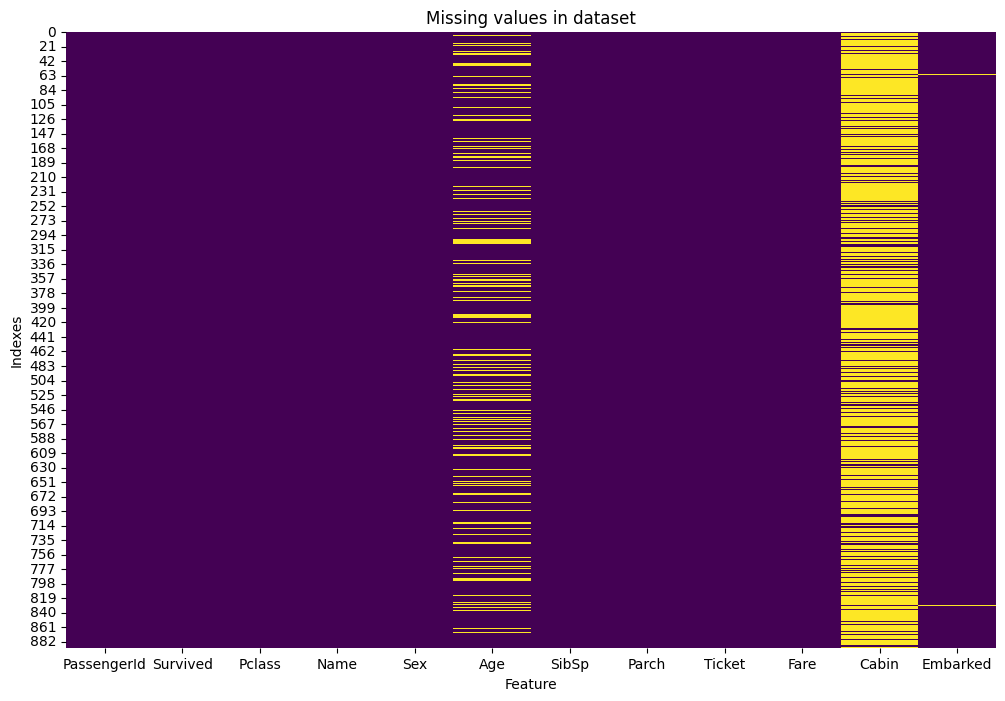

In [8]:
print("Presentation of missing data for indexes in the form of heatmap")
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cbar=False, cmap='viridis')
plt.xlabel('Feature')
plt.ylabel('Indexes')
plt.title('Missing values in dataset')
plt.show()

**Conclusion**

The most missing values is in `Cabin` - 687 missing values which is 77,1% total data!. drop is to consider, no way to impute/calculate data.

`Age` - ~20% data is missing (187 values), we can impute missing values by median or mean.

`Embarked` - 2 missing values, we can impute the most frequency value.




## Variable visualization 

Let's start from visualize **target** variable, the next step will be numerical variables and finally we will see categorical variables look like

### Target variable - Survived

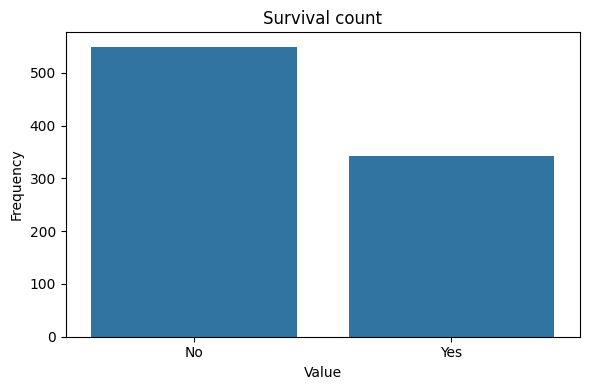

In [42]:
plt.figure(figsize=(6,4))
sns.countplot(df, x='Survived')
ax = plt.gca()
ax.set_xticks(ticks=df.Survived.unique(), labels=['No', 'Yes'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Survival count')
plt.tight_layout()
plt.show()

We can see, that the moest people did not survive the disaster.

Now we should check relationship beetwen survived and other feature

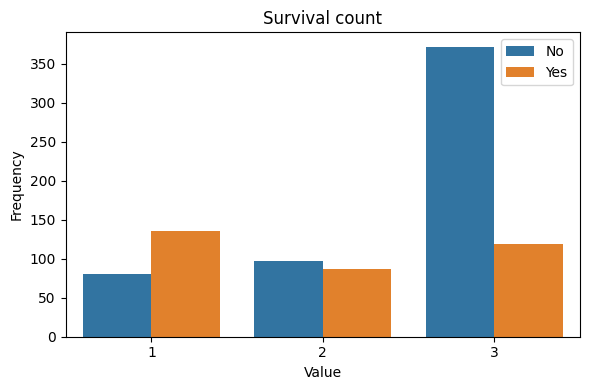

In [50]:
plt.figure(figsize=(6,4))
sns.countplot(df, x='Pclass', hue='Survived')
ax = plt.gca()
ax.legend(labels=['No','Yes'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Survival count')
plt.legend
plt.tight_layout()
plt.show()

we can say "If pesrson was in 3rd class they had ~70% chance of not surviving, maybe is good way to create new feature `is_from_3_class?`
